In [4]:
# Iris + K-Means (elbow+silhouette to pick k) + PCA + lightweight dashboard

In [6]:
# STEP 1: Imports

In [26]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score
import warnings; warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid", palette="muted")
rng = np.random.RandomState(42)

In [28]:
# STEP 2: Load and scale

In [44]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [30]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
# STEP 3: Pick k via elbow and silhouette

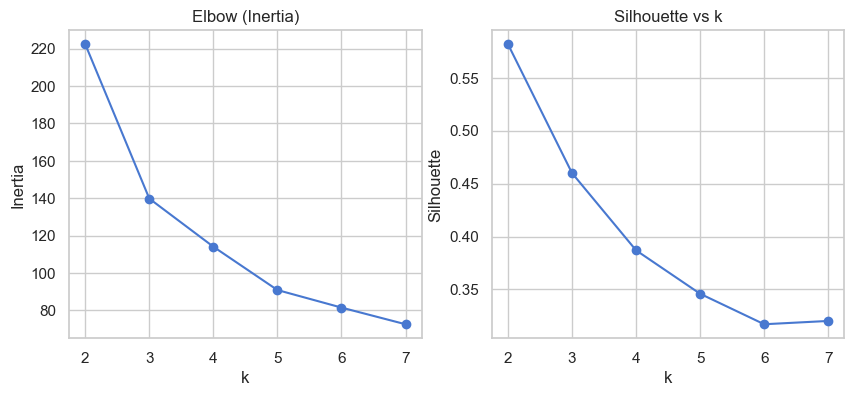

In [34]:
ks = list(range(2, 8))
inertias, sils = [], []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(Xs)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(X_scaled, km.labels_))
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(ks, inertias, marker="o"); ax[0].set_title("Elbow (Inertia)"); ax[0].set_xlabel("k"); ax[0].set_ylabel("Inertia")
ax[1].plot(ks, sils, marker="o"); ax[1].set_title("Silhouette vs k"); ax[1].set_xlabel("k"); ax[1].set_ylabel("Silhouette")
plt.show()
k_best = ks[int(np.argmax(sils))]

In [ ]:
# STEP 4: Fit final K-Means

In [38]:
k_best = 3
kmeans = KMeans(n_clusters=k_best, random_state=42, n_init=25)
labels = kmeans.fit_predict(X_scaled)

In [20]:
# STEP 5: PCA 2D projection

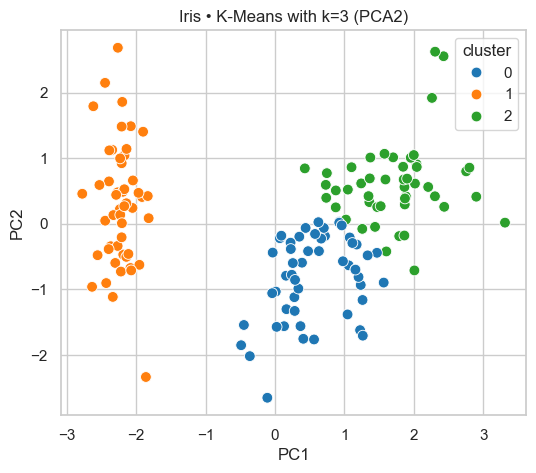

In [40]:
pca = PCA(n_components=2, random_state=42)
Xp = pca.fit_transform(X_scaled)
plt.figure(figsize=(6,5))
sns.scatterplot(x=Xp[:,0], y=Xp[:,1], hue=labels, palette="tab10", s=60)
plt.title(f"Iris • K-Means with k={k_best} (PCA2)")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.legend(title="cluster")
plt.show()

In [ ]:
# STEP 6: Evaluation and quick dashboard (Plotly if available)

{'k': 3, 'silhouette': 0.46, 'ARI_vs_true': 0.62}


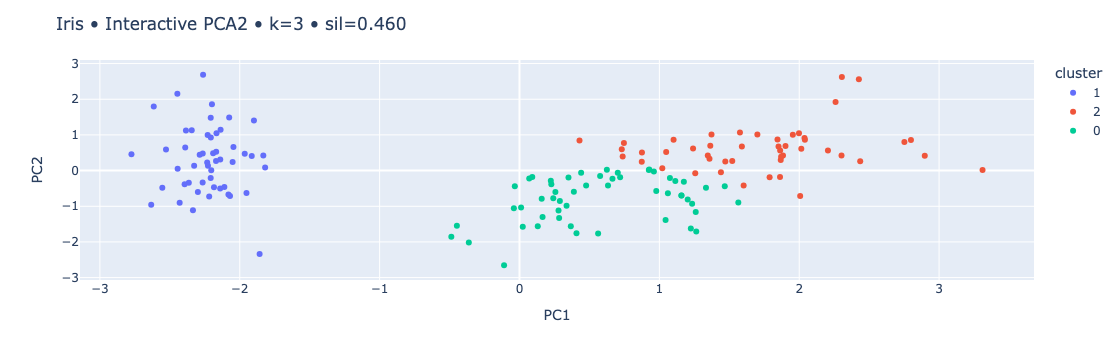

In [48]:
sil = silhouette_score(X_scaled, labels)
ari = adjusted_rand_score(y, labels)
print({"k":k_best, "silhouette":round(sil,3), "ARI_vs_true":round(ari,3)})
try:
    import plotly.express as px
    df_plot = pd.DataFrame({
        "PC1": Xp[:,0],
        "PC2": Xp[:,1],
        "cluster": labels.astype(str),  # ← categorical
        "species": y.map(dict(enumerate(iris.target_names)))
    })
    fig = px.scatter(df_plot, x="PC1", y="PC2", color="cluster", hover_data=["species"])
    fig.update_layout(title=f"Iris • Interactive PCA2 • k={k_best} • sil={sil:.3f}")
    fig.show()
except Exception as e:
    print("Plotly not available — skipped interactive chart.")